<a href="https://colab.research.google.com/github/1991ta/hello/blob/master/module3_graded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import networkx as nx
import numpy as np 

phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

In [ ]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz 

In [107]:
print(G[2])
print(G[6])
print(G[10])

Graph named 'phase2' with 24 nodes and 28 edges
Graph named 'phase6' with 27 nodes and 47 edges
Graph named 'phase10' with 42 nodes and 50 edges


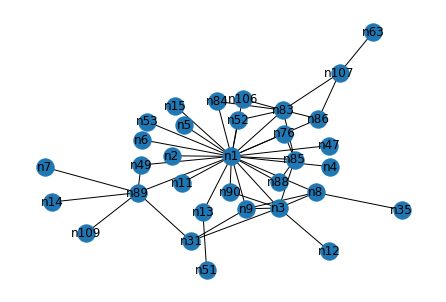

In [111]:
i=4
nx.draw(G[i], pos=nx.drawing.nx_agraph.graphviz_layout(G[i]), with_labels=True)  


In [ ]:
nx.degree_centrality(G[9])

In [ ]:
nx.betweenness_centrality(G[9], normalized = True)

In [ ]:
nx.eigenvector_centrality(G[3])

In [ ]:
v=np.array(list(nx.eigenvector_centrality(G[3]).values()))
print(np.sum(v**2))

In [ ]:
nx.eigenvector_centrality(G[9])
                          

In [ ]:
# nx.betweenness_centrality(G[1], normalized = True)
df_bws = pd.DataFrame.from_dict(nx.betweenness_centrality(G[1], normalized = True), orient='index')
df_bws
# for i in range(1,12):
#   df_bws.add =  nx.betweenness_centrality(G[i], normalized = True)

In [78]:
dict1 = nx.betweenness_centrality(G[1], normalized = True)
# df_bws1 = pd.DataFrame.from_dict(dict1, orient='index')
nx.betweenness_centrality(G[1], normalized = True)['n1']

0.9065934065934067

In [ ]:
mylist = []
for i in range(1,12):
  mylist.append(list(nx.betweenness_centrality(G[i], normalized = True).keys()))
 
my_rows = np.unique(np.concatenate(mylist))


In [69]:
mylist2 = [] 
for i in range(1,12):
  mylist2.append('phase'+str(i))

my_columns = np.array(mylist2)

In [99]:
df_btw = pd.DataFrame(index = my_rows, columns = my_columns)
for i in my_rows:
  for j in range(1,12):
    # print(i,j)
    # print(my_rows)
    # print(my_columns)
    try:
      df_btw.loc[i,my_columns[j-1]] = nx.betweenness_centrality(G[j], normalized = True)[i]
    except:
      pass
((df_btw.sum(axis=1))/11).sort_values()    

In [ ]:
df_ev = pd.DataFrame(index = my_rows, columns = my_columns)

for i in my_rows:
  for j in range(1,12):
    try:
      df_ev.loc[i,my_columns[j-1]] = nx.eigenvector_centrality(G[j])[i]
    except:
      pass

((df_ev.sum(axis=1))/11).sort_values()      
    